In [1]:
import numpy as np
import pandas as pd
import tempfile
import json
import seaborn as sns
sns.set(style="darkgrid")

import warnings
warnings.simplefilter('ignore')
import logging
logging.basicConfig()
logger = logging.getLogger()
logger.setLevel(logging.INFO)

from banditpylib.arms import BernoulliArm
from banditpylib.bandits import OrdinaryBandit
from banditpylib.protocols import SinglePlayerProtocol
from banditpylib.learners.ordinary_fbbai_learner import Uniform, SR, SH

In [2]:
budget = 1000
means = np.random.uniform(0, 1, 50)
arms = [BernoulliArm(mean) for mean in means]
bandit = OrdinaryBandit(arms=arms)
learners = [Uniform(arm_num=len(arms), budget=budget), 
            SR(arm_num=len(arms), budget=budget),
            SH(arm_num=len(arms), budget=budget)]
# for each setup we run 200 trial
trials = 200
temp_file = tempfile.NamedTemporaryFile()

In [3]:
for learner in learners:
  # game simulation
  game = SinglePlayerProtocol(bandit=bandit, learner=learner)
  game.play(trials=trials, output_filename=temp_file.name)

INFO:absl:uniform's play with ordinary_bandit runs 0.25 seconds.
INFO:absl:sr's play with ordinary_bandit runs 0.66 seconds.
INFO:absl:sh's play with ordinary_bandit runs 0.25 seconds.


In [4]:
with open(temp_file.name, 'r') as f:
  data = []
  lines = f.readlines()
  for line in lines:
    data.append(json.loads(line))
  data_df = pd.DataFrame.from_dict(data)

In [5]:
data_df.head()

,bandit,learner,rounds,total_actions,regret
0,ordinary_bandit,uniform,1,1000,1
1,ordinary_bandit,uniform,1,1000,0
2,ordinary_bandit,uniform,1,1000,1
3,ordinary_bandit,uniform,1,1000,1
4,ordinary_bandit,uniform,1,1000,0


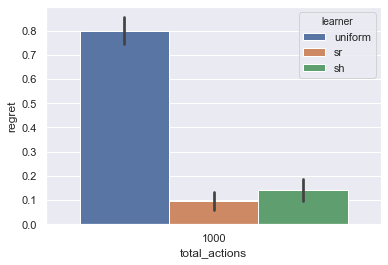

In [6]:
sns.barplot(x='total_actions', y='regret', hue='learner', data=data_df)